### Load data set with features

In [1]:
from create_df import read_df
df, dfc, all_homes, appliance_min, national_average = read_df()

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 29 days


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
run all_functions.py

In [4]:
run features.py

In [5]:
import json

In [6]:
from sklearn.cross_validation import KFold


In [13]:
import sys

from sklearn.neighbors import KNeighborsRegressor
#o = {}
for appliance in ["hvac"]:
    if appliance not in o:
        o[appliance] = {}
    if appliance=="hvac":
        start, stop=5, 11
    else:
        start, stop=1, 13
    for num_homes in [22, 24, 26, 28, 30]:
        if num_homes not in o[appliance]:
            o[appliance][num_homes] = {}
        for random_seed in range(10):
            o[appliance][num_homes][random_seed] = {}
            a,optimal_dict,train_homes = find_optimal_features_subset(df, dfc, all_homes, appliance_min, 
                                                                          national_average, [appliance], 
                                 {"All":feature_map["Static"]},
                              NUM_NEIGHBOURS_MAX=7, F_length_max=6, metric="mean",
                              train_outlier=True, test_outlier=False, outlier_features=None, outlier_fraction=0.1,
                              print_steps=False,random_seed=random_seed, num_homes=num_homes)
            f = optimal_dict[appliance]['All']['f']
            k = optimal_dict[appliance]['All']['k']
            for month in range(start, stop):   
                
                print appliance, num_homes, random_seed, month
                sys.stdout.flush()
                
                clf = KNeighborsRegressor(n_neighbors=k)
                clf.fit(df.ix[train_homes][f], df.ix[train_homes]['%s_%d' %(appliance, month)])
                test_homes = np.setdiff1d(all_homes[appliance], train_homes)
                pred = pd.Series(clf.predict(df.ix[test_homes][f]), index=test_homes)
                gt = df.ix[test_homes]['%s_%d' %(appliance, month)]
                accur = 100-(pred-gt).abs().div(gt).mul(100)
                accur[accur<0]=0
                o[appliance][num_homes][random_seed][month]=accur.mean().mean()
            o[appliance][num_homes][random_seed] = pd.Series(o[appliance][num_homes][random_seed][month]).mean()
        o[appliance][num_homes] = o[appliance][num_homes].values()
                
            

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
hvac
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
********************
All
********************
5 ['area'] 74.0302708387
--------------------------------------------------------------------------------
hvac 22 0 5
hvac 22 0 6
hvac 22 0 7
hvac 22 0 8
hvac 22 0 9
hvac 22 0 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
hvac
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
********************
All
********************
6 ['area'] 68.5154617229
--------------------------------------------------------------------------------
hvac 22 1 5
hvac 22 1 6
hvac 22 1 7
hvac 22 1 8
hvac 22 1 9
hvac 22 1 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
hvac
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
********************
All
********************
5 ['area'] 74.5088665187
--------------------------------------------------------------------------------
hvac 22 2 5
hvac 22 2 6
hvac 22 2 7
hvac 22 2 8
hvac 22 2 9
hvac 22 2 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
hvac
%%%%%%%%%%%%%%%%%%

KeyboardInterrupt: 

In [14]:
d = pd.DataFrame({num:o[appliance][num] for num in range(10, 28, 2)})

In [15]:
d.mean()

10    54.843610
12    55.200658
14    58.065114
16    56.878032
18    56.123473
20    54.168164
22    54.134349
24    51.146492
26    50.301709
dtype: float64

In [120]:
o[appliance]

{10: {0: 64.650257340519772},
 15: {0: 59.832796095091076},
 20: {0: 70.596354522818601}}

In [118]:
o[appliance]

{10: {0: 56.181039909549369},
 11: {0: 53.839262737242692},
 15: {0: 57.109780976630304},
 20: {0: 51.969433707156547}}

In [125]:
len(feature_map["Monthly"])

15

In [55]:
output = {}
for appliance_name, appliance_results in out_appliance.iteritems():
    output[appliance_name] = pd.Series(appliance_results[0])
    tot = len(appliance_results)
    for i in range(1, tot):
        output[appliance_name] = output[appliance_name] + pd.Series(appliance_results[i])

output_df = pd.DataFrame(output)
output_df = output_df.div(tot)

In [2]:
#output_df.to_csv("sensitivity_num_homes.csv")
output_df = pd.read_csv("sensitivity_num_homes.csv", index_col=0)

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
from common_functions import latexify, format_axes

In [5]:
latexify()

/Users/nipunbatra/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/Users/nipunbatra/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [33]:
tableau20blind =  [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]
  
# Rescale to values between 0 and 1
for i in range(len(tableau20blind)):  
    r, g, b = tableau20blind[i]  
    tableau20blind[i] = (r / 255., g / 255., b / 255.)
    
markers = ['o','^','*','v','.','d']

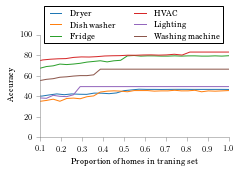

In [35]:
appliance_name_mapping = {"dr": "Dryer", "wm": "Washing machine",
                          "fridge":"Fridge","light":"Lighting",
                          "hvac":"HVAC","dw":"Dish washer"}

normalised_output = {}
fig, ax = plt.subplots(1,1)
for i, appliance_name in enumerate(output_df.columns):
    temp = output_df[appliance_name].dropna()
    temp.index= np.linspace(0, 1, len(output_df[appliance_name].dropna()))
    normalised_output[appliance_name] = temp
    pd.Series(normalised_output[appliance_name]).plot(ax=ax, label=appliance_name_mapping[appliance_name], 
                                                      color=tableau20blind[i*2])
plt.xlim((0.1,1.))
plt.ylim((0, 100))
plt.legend(loc='center left', bbox_to_anchor=(0, 1.1), ncol=2)
plt.xlabel("Proportion of homes in traning set")
plt.ylabel("Accuracy")
format_axes(plt.gca())
plt.tight_layout()
plt.savefig("/Users/nipunbatra/git/monthly-disaggregation/results/sensitivity_num_homes.png",bbox_inches="tight")
plt.savefig("/Users/nipunbatra/git/monthly-disaggregation/results/sensitivity_num_homes.pdf",bbox_inches="tight")

In [50]:
normalised_output_df = pd.DataFrame(normalised_output)